Convolutional neural networks (CNNs) are a class of deep neural networks, most commonly used in computer vision applications.

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
print('keras using %s backend'%keras.backend.backend())
import matplotlib.pyplot as graph
%matplotlib inline 
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap']  ='rainbow'

Using TensorFlow backend.


keras using tensorflow backend


Now importing the dataset, and split it into the training, validation, and test sets.


In [2]:
from keras.datasets import mnist

#This is the training data with 6400 samples
train_X = mnist.load_data()[0][0][:6400].astype('float32')
train_Y = mnist.load_data()[0][1][:6400]

#This is the validation data, with 1600 samples
valid_X = mnist.load_data()[1][0][:1600].astype('float32')
valid_Y = mnist.load_data()[1][1][:1600]

#This is the test data with 2000 samples 
test_X = mnist.load_data()[1][0][-2000:].astype('float32')
test_Y = mnist.load_data()[1][1][-2000:]

print('train_X:', train_X.shape, end = '')
print(', train_Y:', train_Y.shape, end = '')
print('valid_X:', valid_X.shape, end = '')
print(', valid_Y:', valid_Y.shape, end = '')
print('test_X:', test_X.shape, end = '')
print(', test_Y', test_Y.shape)


train_X: (6400, 28, 28), train_Y: (6400,)valid_X: (1600, 28, 28), valid_Y: (1600,)test_X: (2000, 28, 28), test_Y (2000,)


So we have 6400 training samples, 1600 validation samples, and 2000 test samples.

Each sample is an greyscale image - 28 pixels wide and 28 pixels high. Each pixel is really a number from 0 to 255 - 0 being fully black, 255 being fully white. When we graph the 28x28 numbers, we can see the image.

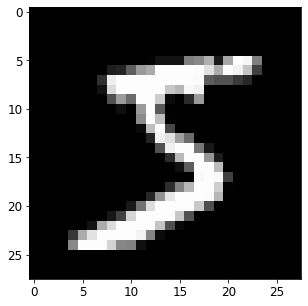

In [3]:
# use train_X[0] or ANOTHER SAMPLE e.g. train_X[1] or train_X[2]
graph.imshow(train_X[0], cmap = 'gray',interpolation = 'nearest')

graph.show()

The neural network will use the 28x28 values of each image to predict what each image represents.

As each value is between 0 and 255, we'll scale the values down by dividing by 255 (this makes it faster for the Neural Network to train).

We need to reshape our data to get it working well with our neural network.

In [4]:
#reshape X sets so that they fit the convolutional layers

#this gets the image dimensions -28
dim = train_X[0].shape[0]

train_X = train_X.reshape(train_X.shape[0], dim, dim, 1)
valid_X = valid_X.reshape(valid_X.shape[0], dim, dim, 1)
test_X = test_X.reshape(test_X.shape[0], dim, dim, 1)

#feature scaling: scale the values so they are between 0 and 1, instead of 0 and 255
train_X = train_X / 255
valid_X = valid_X / 255
test_X = test_X / 255

#print the label for the first example 
print(train_Y[0])

5


Represent this number as a one-hot vector, so the neural network knows it is a category. Keras can convert these labels into one-hot vectors easily with the function - to_categorical

In [5]:
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

# 10 being the number of categories (0 - 9)
print(train_Y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Now, build anoter neural network

In [6]:
#set a randomisation seed for replicatability 
np.random.seed(6)

model = Sequential()

The Convolutional in Convolutional Neural Networks refers the pre-processing the network can do itself.

In [7]:
model.add(Conv2D(28, kernel_size = (3, 3), activation = 'relu', input_shape = (dim, dim, 1)))
model.add(Conv2D(56, (3,3), activation = 'relu'))

Add pooling layers: Pooling layers help speed up training time and make features it detects more robos. They act by downsampling the data- reducing the data size and complexity.


Apply dropout: Dropout is a technique to help prevent overfitting. it makes nodes 'dropout"-- turning them off randomly. 


Flatten the data to a vector (the output of step 2 is a vector).

In [8]:
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.125))

model.add(Flatten())



In [9]:
# Dense layers perform classification - we have extracted the features with the convolutional pre-processing

model.add(Dense(128, activation = 'relu'))

#more dropouts
model.add(Dropout(0.25))

#Output layer: Softmax outputs the probability for each category
#the number of classes (digits 0 to 9)

model.add(Dense (10, activation = tf.nn.softmax))

#finally, compile 
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])

In [ ]:
#Now train it 
training_stats = model.fit(train_X, train_Y, batch_size = 128, epochs = 12, verbose = 1, validation_data = (valid_X,valid_Y))

evaluation =model.evaluate(test_X, test_Y, verbose = 0)

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100 * evaluation[1]))

#plot the train statistics to see how it developed over time 
accuracy, =graph.plot(training_stats.history['acc'], label = 'Accuracy')
training_loss, =graph.plot(training_stats.history['loss'], label = 'Training Loss')

graph.legend(handles = [accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10*loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linstyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linstyle = ':', alpha = 0.5)
graph.show()




Train on 6400 samples, validate on 1600 samples
Epoch 1/12


In [ ]:
#Test on a new sample that it hasn't seen, and see how it classifies it 
#any number between 0 - 1999
sample = test_X[1200].reshape(dim, dim)

graph.imshow(sample, cmap ='gray', interpolation = 'nearest')
graph.show()

prediction = model.predict(sample.reshape(1, dim, dim, 1))
print('prediction: %i' %(np.argmax(prediction)))

Done ! built a convolutional neural network that is able to recognise handwritten digits with very high accuracy.